## Import & Paths

In [3]:
#Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt

#Paths
processed_path = r"C:\UNI\Code\F1_Race_Predictor\data\processed"
models_path = r"C:\UNI\Code\F1_Race_Predictor\models"

season = 2023
gp = "Bahrain"

## Load Data

In [9]:
#Load processed data
q_results = pd.read_csv(fr"{processed_path}\{season}_{gp}_qualifying_clean.csv")
r_results = pd.read_csv(fr"{processed_path}\{season}_{gp}_race_clean.csv")

#Merge qualifying and race results on Abbreviation (driver code)
df = pd.merge(
    q_results[['Abbreviation', 'Q1', 'Q2', 'Q3']],
    r_results[['Abbreviation', 'Gridposition', 'Position']],
    on='Abbreviation'
)

print("Training Dataset:")
display(df.head())
display(df.tail())

Training Dataset:


,Abbreviation,Q1,Q2,Q3,Gridposition,Position
0,VER,0 days 00:01:31.295000,0 days 00:01:30.503000,0 days 00:01:29.708000,1.0,1.0
1,PER,0 days 00:01:31.479000,0 days 00:01:30.746000,0 days 00:01:29.846000,2.0,2.0
2,LEC,0 days 00:01:31.094000,0 days 00:01:30.282000,0 days 00:01:30,3.0,19.0
3,SAI,0 days 00:01:30.993000,0 days 00:01:30.515000,0 days 00:01:30.154000,4.0,4.0
4,ALO,0 days 00:01:31.158000,0 days 00:01:30.645000,0 days 00:01:30.336000,5.0,3.0


,Abbreviation,Q1,Q2,Q3,Gridposition,Position
15,SAR,0 days 00:01:31.652000,NaN,NaN,16.0,12.0
16,MAG,0 days 00:01:31.892000,NaN,NaN,17.0,13.0
17,PIA,0 days 00:01:32.101000,NaN,NaN,18.0,20.0
18,DEV,0 days 00:01:32.121000,NaN,NaN,19.0,14.0
19,GAS,0 days 00:01:32.181000,NaN,NaN,20.0,9.0


## Feature Engineering

In [17]:
# Convert timedelta to total seconds
for col in ['Q1', 'Q2', 'Q3']:
    df[col] = pd.to_timedelta(df[col]).dt.total_seconds()


In [18]:
# Define features (inputs) and target (output)
features = ['Q1', 'Q2', 'Q3', 'Gridposition']
x = df[features].fillna(0) # Fill NaN values with 0 (non-qualifiers)
y = df['Position']

## Train-Test Split

In [19]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

## Train Model

In [21]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluation

In [24]:
# Predictions
y_pred = model.predict(x_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 8.27
R² Score: -0.52


## Feature Importance

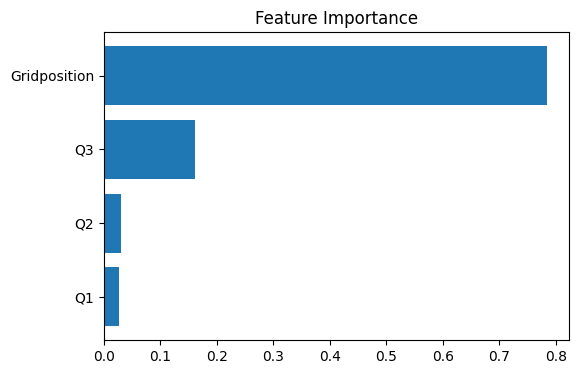

In [25]:
# Feature importance plot
importances = model.feature_importances_
plt.figure(figsize=(6,4))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()


## Save Model

In [27]:
# Save trained model
joblib.dump(model, fr"{models_path}\{season}_{gp}_rf_model.pkl")
print("Model saved successfully!")


Model saved successfully!
